# Preprocessing data

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('student.csv')

# sex F(0) 591 M(1) 453
# famsize GT3(0) 738 LE3(1) 306
# Pstatus A(0) 121 T(1) 923
# Mjob at_home(0) 194 health(1) 82 other(2) 399 service(3) 239 teacher(4) 130
# Fjob at_home(0) 62 health(1) 41 other(2) 584 service(3) 292 teacher(4) 65
# higher yes(1) 955 no(0) 89
# romantic yes(1) 371 no(0) 673

In [88]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import Bunch

columns_name = ['sex', 'famsize', 'Pstatus', 'higher', 'romantic']
encoder = OrdinalEncoder()
le = LabelEncoder()
df[columns_name] = encoder.fit_transform(df[columns_name])

# df['Dalc'] = le.fit_transform(df['Dalc'])
# df['Walc'] = le.fit_transform(df['Walc'])

In [89]:
selected_columns = ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'goout', 'health', 'Dalc', 'Walc']
df = df[selected_columns].copy()

In [90]:
X = df[['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'goout', 'health']]
X = pd.get_dummies(X, columns=['Mjob', 'Fjob'])
# 
yD = df['Dalc']
yW = df['Walc']
# selected = X[list(X.columns)]
# interestCols = ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Fedu', 'goout', 'health'
#                       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
#                       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher']

In [91]:
datasetD = {
    'data': X,
    'target': yD,
    'DESCR': 'Student alcohol consumption during weekday',
    'feature_names': ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Fedu', 'goout', 'health',
                      'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
                      'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher'],
    'target_names': ['very low', 'low', 'moderate', 'high', 'very high'],
}

datasetW = {
    'data': X,
    'target': yW,
    'DESCR': 'Student alcohol consumption during weekday',
    'feature_names': ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Fedu', 'goout', 'health',
                      'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
                      'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher'],
    'target_names': ['very low', 'low', 'moderate', 'high', 'very high'],
}


bunchD = Bunch(**datasetD)
bunchW = Bunch(**datasetW)

X = bunchD.data
yD = bunchD.target
yW = bunchW.target

feature_names = bunchD.feature_names
class_names = bunchD.target_names

In [92]:
np.sum(datasetD['data']['Mjob_health'])

82

Import the important libraries of our modeling process

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
from sklearn.model_selection import GridSearchCV

# Import used models
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import pickle


# SVM

In [94]:
svcD = svm.SVC(kernel='poly', degree=50, class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, yD, test_size=0.2, random_state=30)
svcD.fit(X_train, y_train)
filename = 'svmD.sav'
pickle.dump(svcD, open(filename, 'wb'))

y_pred = svcD.predict(X_test)
# print(y_test, y_pred)
print(classification_report(y_test, y_pred)) #0.86

              precision    recall  f1-score   support

           1       0.93      0.89      0.91       153
           2       0.76      0.81      0.78        36
           3       0.82      0.90      0.86        10
           4       0.00      0.00      0.00         3
           5       0.56      0.71      0.62         7

    accuracy                           0.86       209
   macro avg       0.61      0.66      0.64       209
weighted avg       0.87      0.86      0.86       209


In [95]:
#print(accuracy_score(y_test, y_pred))
#print(f1_score(y_test, y_pred, average='micro'))
#print(recall_score(y_test, y_pred, average='micro'))

In [96]:
svcW = svm.SVC(kernel='poly', degree=50, class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, yW, test_size=0.2, random_state=80)
svcW.fit(X_train, y_train)

filename = 'svmW.sav'
pickle.dump(svcW, open(filename, 'wb'))

y_pred = svcW.predict(X_test)
# print(y_test, y_pred)
print(classification_report(y_test, y_pred)) # 0.74

              precision    recall  f1-score   support

           1       0.79      0.85      0.82        81
           2       0.67      0.69      0.68        49
           3       0.67      0.62      0.64        39
           4       0.88      0.76      0.81        29
           5       0.60      0.55      0.57        11

    accuracy                           0.74       209
   macro avg       0.72      0.69      0.71       209
weighted avg       0.74      0.74      0.74       209


# Random Forest Tree

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, yD, test_size=0.2, random_state=80)

rftD = RandomForestClassifier(max_depth=9, n_estimators=400, class_weight='balanced', random_state=30)
rftD.fit(X_train, y_train)
filename = 'rftD.sav'
pickle.dump(rftD, open(filename, 'wb'))
y_pred = rftD.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("accuracy:", acc) #0.9138755980861244
print(classification_report(y_test, y_pred))

accuracy: 0.9138755980861244
              precision    recall  f1-score   support

           1       0.93      0.99      0.96       149
           2       0.97      0.79      0.87        42
           3       0.73      0.67      0.70        12
           5       0.50      0.33      0.40         6

    accuracy                           0.91       209
   macro avg       0.78      0.69      0.73       209
weighted avg       0.91      0.91      0.91       209


In [98]:
# tree_to_plot = 2 
# 
# plt.figure(figsize=(30,20))
# plt.rcParams['lines.linewidth'] = 0.3
# plot_tree(rftD.estimators_[tree_to_plot], feature_names=feature_names, filled=True, class_names=class_names)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, yW, test_size=0.2, random_state=80)
rftW = RandomForestClassifier(max_depth=9, n_estimators=400, class_weight='balanced', random_state=80)
rftW.fit(X_train, y_train)
filename = 'rftW.sav'
pickle.dump(rftW, open(filename, 'wb'))

y_pred = rftW.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy:", acc) # 0.7655502392344498
print(classification_report(y_test, y_pred))

accuracy: 0.7655502392344498
              precision    recall  f1-score   support

           1       0.77      0.88      0.82        81
           2       0.80      0.65      0.72        49
           3       0.71      0.62      0.66        39
           4       0.76      0.86      0.81        29
           5       0.80      0.73      0.76        11

    accuracy                           0.77       209
   macro avg       0.77      0.75      0.75       209
weighted avg       0.77      0.77      0.76       209


In [100]:
# tree_to_plot = 2 
# 
# plt.figure(figsize=(30,20))
# plt.rcParams['lines.linewidth'] = 0.3
# plot_tree(rftW.estimators_[tree_to_plot], feature_names=feature_names, filled=True, class_names=class_names)

# XGBoost

In [101]:
modelD = XGBClassifier(n_estimators=300, max_depth=12, max_leaves=0, learning_rate=0.05, objective='multi:softmax', booster='gbtree', colsample_bytree=1, min_child_weight=1, importance_type='total_gain')

X_train, X_test, y_train, y_test = train_test_split(X, yD, test_size=0.2, random_state=30)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
modelD.fit(X_train, y_train)
filename = 'xgboostD.sav'
pickle.dump(modelD, open(filename, 'wb'))

y_pred = modelD.predict(X_test)
y_pred = le.inverse_transform(y_pred)
print(classification_report(y_test, y_pred)) #0.9138755980861244

              precision    recall  f1-score   support

           1       0.95      0.97      0.96       153
           2       0.83      0.81      0.82        36
           3       0.75      0.90      0.82        10
           4       0.00      0.00      0.00         3
           5       0.83      0.71      0.77         7

    accuracy                           0.91       209
   macro avg       0.67      0.68      0.67       209
weighted avg       0.90      0.91      0.91       209


/Users/monica/Desktop/DSGP8/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/monica/Desktop/DSGP8/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/monica/Desktop/DSGP8/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [102]:
modelW = XGBClassifier(n_estimators=200, max_depth=9, learning_rate=0.05, objective='multi:softmax', booster='gbtree', min_child_weight=1, sampling_method='uniform', importance_type='total_gain')

X_train, X_test, y_train, y_test = train_test_split(X, yW, test_size=0.2, random_state=80)
# Transform the labels [1,2,3,4,5] to [0,1,2,3,4] in order to fit the model
le = LabelEncoder()
y_train = le.fit_transform(y_train)
modelW.fit(X_train, y_train)
filename = 'xgboostW.sav'
pickle.dump(modelW, open(filename, 'wb'))

y_pred = modelW.predict(X_test)
y_pred = le.inverse_transform(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.86      0.81        81
           2       0.77      0.67      0.72        49
           3       0.90      0.69      0.78        39
           4       0.68      0.86      0.76        29
           5       0.86      0.55      0.67        11

    accuracy                           0.77       209
   macro avg       0.79      0.73      0.75       209
weighted avg       0.78      0.77      0.77       209


In [103]:
# # Use Grid Search CV to find the best parameters for xgboost model
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
# }
# 
# xgbc = XGBClassifier()
# y_train = le.fit_transform(y_train)
# #clf = GridSearchCV(estimator=xgbc, param_grid=param_grid, scoring='accuracy', return_train_score=True, verbose=1, cv=3)
# grid_search = GridSearchCV(
#     estimator=xgbc,
#     param_grid=params,
#     scoring = 'accuracy',
#     n_jobs = 10,
#     cv = 5,
#     verbose=True,
# )
# grid_search.fit(X_train, y_train)

In [104]:
# grid_search.best_params_

# Evaluating performance of different models

In [138]:
from sklearn import model_selection


In [139]:
# Preparing evaluation variables
resultsW = []
resultsD = []
seedW = 80
seedD = 30
names = ['SVM', 'RandomForest', 'XGBoost']
scoring = 'accuracy'
modelsW = ['svcW', 'rftW']
modelsD = ['svcD', 'rftD']
le = LabelEncoder()
X_train, X_test, y_train, y_test = train_test_split(X, yD, test_size=0.2, random_state=30)
# X_train, X_test, y_train, y_test = train_test_split(X, yW, test_size=0.2, random_state=80)

In [140]:
# Evaluating models for weekend alcohol consumption
for model in modelsW:
    loaded_model = pickle.load(open(model+'.sav', 'rb'))
    kfold = model_selection.KFold(n_splits=10, random_state=seedW, shuffle=True)
    cv_results = model_selection.cross_val_score(loaded_model, X, yW, cv=kfold, scoring=scoring)
    resultsW.append(cv_results)
    msg = "%s: %f (%f)" % (model, cv_results.mean(), cv_results.std())
    print(msg)

loaded_model = pickle.load(open('xgboostW.sav', 'rb'))
kfold = model_selection.KFold(n_splits=10, random_state=seedW, shuffle=True)
yW = le.fit_transform(yW)
cv_results = model_selection.cross_val_score(loaded_model, X, yW, cv=kfold, scoring=scoring)
resultsW.append(cv_results)

msg = "%s: %f (%f)" % ('xgboost', cv_results.mean(), cv_results.std())
print(msg)

KeyboardInterrupt: 

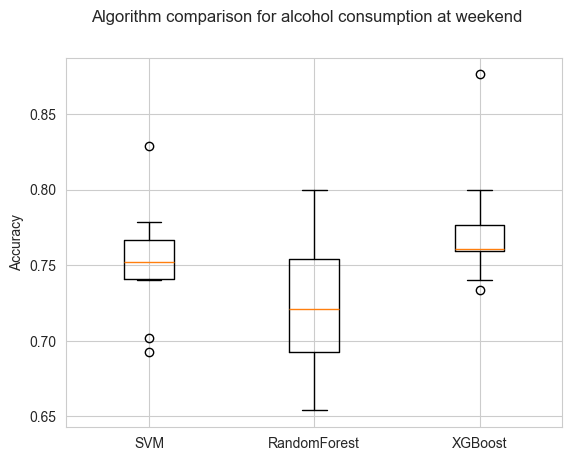

In [108]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm comparison for alcohol consumption at weekend')
ax = fig.add_subplot(111)
plt.boxplot(resultsW)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.savefig('boxplotWeekend.png')
plt.show()

In [109]:
# Evaluating models for weekend alcohol consumption
for model in modelsD:
    loaded_model = pickle.load(open(model+'.sav', 'rb'))
    kfold = model_selection.KFold(n_splits=10, random_state=seedD, shuffle=True)
    cv_results = model_selection.cross_val_score(loaded_model, X, yD, cv=kfold, scoring=scoring)
    resultsD.append(cv_results)

    msg = "%s: %f (%f)" % (model, cv_results.mean(), cv_results.std())
    print(msg)

loaded_model = pickle.load(open('xgboostD.sav', 'rb'))
kfold = model_selection.KFold(n_splits=10, random_state=seedD, shuffle=True)
yD = le.fit_transform(yD)
cv_results = model_selection.cross_val_score(loaded_model, X, yD, cv=kfold, scoring=scoring)
resultsD.append(cv_results)
# namesD.append('xgboost')

msg = "%s: %f (%f)" % ('xgboost', cv_results.mean(), cv_results.std())
print(msg)

svcD: 0.836273 (0.043785)
rftD: 0.855330 (0.045135)
xgboost: 0.854386 (0.038067)


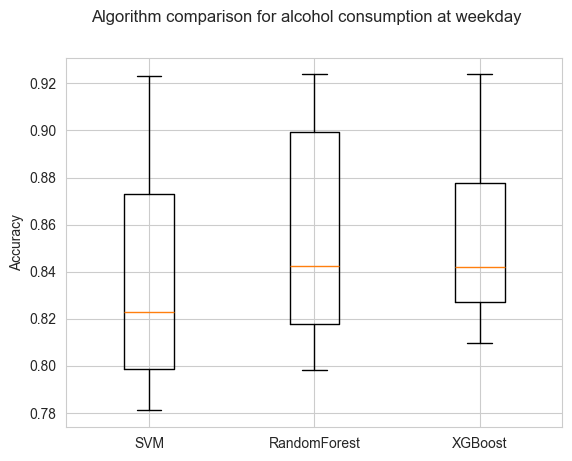

In [110]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm comparison for alcohol consumption at weekday')
ax = fig.add_subplot(111)
plt.boxplot(resultsD)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.savefig('boxplotWeekday.png')
plt.show()

In [186]:
from xgboost import plot_importance
from sklearn.inspection import permutation_importance
X_train, X_test, y_train, y_test = train_test_split(X, yD, test_size=0.2, random_state=30)
xgboostD = pickle.load(open('xgboostD.sav', 'rb'))
svmD = pickle.load(open('svmD.sav', 'rb'))
rftD = pickle.load(open('rftD.sav', 'rb'))

xgbD_importances = xgboostD.feature_importances_
xgbD_importances = pd.Series(xgbD_importances, index=X.columns).sort_values()
rftD_importances = rftD.feature_importances_
rftD_importances = pd.Series(rftD_importances, index=X.columns).sort_values()

svmD_importances = permutation_importance(svmD, X_test, y_test)
sorted_idx = svmD_importances.importances_mean.argsort()
svmD_importances = pd.Series(svmD_importances.importances_mean[sorted_idx], index=X.columns[sorted_idx]).sort_values()

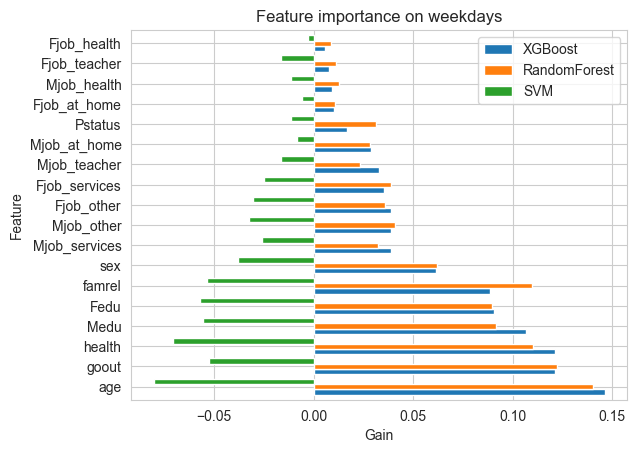

In [187]:
data = {"XGBoost": xgbD_importances, "RandomForest": rftD_importances, "SVM": svmD_importances}
feature_importances = pd.DataFrame(data)
feature_importances.nlargest(20, columns=feature_importances.columns).plot(kind='barh', width=0.8, align='center')
plt.title("Feature importance on weekdays")
plt.xlabel('Gain')
plt.ylabel('Feature')
plt.savefig('./exp/FeatureImportanceD.png', bbox_inches='tight')

Permutation importance of the features
Comparison of training and testing set

In [182]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, yW, test_size=0.2, random_state=80)

xgboostW = pickle.load(open('xgboostW.sav', 'rb'))
rftW = pickle.load(open('rftW.sav', 'rb'))
svmW = pickle.load(open('svmW.sav', 'rb'))

xgbW_importances = xgboostD.feature_importances_
xgbW_importances = pd.Series(xgbW_importances, index=X.columns).sort_values()
rftW_importances = rftW.feature_importances_
rftW_importances = pd.Series(rftW_importances, index=X.columns).sort_values()

svmW_importances = permutation_importance(svmW, X_test, y_test, n_repeats=50, n_jobs=-1)
sorted_idx = svmW_importances.importances_mean.argsort()
svmW_importances = pd.Series(svmW_importances.importances_mean[sorted_idx], index=X.columns[sorted_idx]).sort_values()

In [183]:
print(svmW_importances)

Mjob_services   -1.253589e-02
Fjob_health     -7.368421e-03
Mjob_health     -1.110223e-17
Fjob_at_home     7.655502e-04
age              1.052632e-03
Pstatus          2.392344e-03
Mjob_at_home     7.464115e-03
Mjob_other       7.559809e-03
Fedu             7.751196e-03
Fjob_services    1.014354e-02
Mjob_teacher     1.215311e-02
Fjob_teacher     1.358852e-02
Fjob_other       1.550239e-02
health           1.808612e-02
Medu             1.827751e-02
famrel           2.124402e-02
sex              6.000000e-02
goout            7.885167e-02
dtype: float64


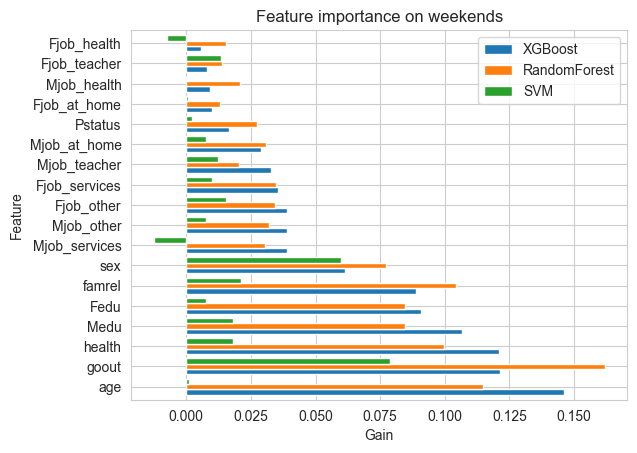

In [185]:
data = {"XGBoost": xgbW_importances, "RandomForest": rftW_importances, "SVM": svmW_importances}
feature_importances = pd.DataFrame(data)
feature_importances.nlargest(20, columns=feature_importances.columns).plot(kind='barh', width=0.8)
plt.title("Feature importance on weekends")
plt.xlabel('Gain')
plt.ylabel('Feature')
plt.savefig('./exp/FeatureImportanceW.png', bbox_inches='tight')
plt.show()

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_test)
y_scaled = scaler.fit_transform(y_test.reshape(-1,1))

svmW_importances = permutation_importance(svmW, x_scaled, y_scaled, n_repeats=30)
sorted_idx = svmW_importances.importances_mean.argsort()
svmW_importances = pd.Series(svmW_importances.importances_mean[sorted_idx], index=X.columns[sorted_idx]).sort_values()

data = {"SVM": svmW_importances}
feature_importances = pd.DataFrame(data)
feature_importances.nlargest(20, columns=feature_importances.columns).plot(kind='barh', width=1)
plt.title("Feature importance on weekends")
plt.xlabel('Gain')
plt.ylabel('Feature')
plt.savefig('./exp/FeatureImportanceW.png', bbox_inches='tight')
plt.show()

/Users/monica/Desktop/DSGP8/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: Classification metrics can't handle a mix of continuous and binary targets